<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Complaints Clustering using VantageCloud Lake on Google and Google Generative AI Embeddings model
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233c'><b>Introduction:</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233c">This feature uses advanced clustering techniques powered by <b>VantageCloud Lake</b> and <b>Google's Generative AI Embeddings</b> model to group similar customer complaints together. By identifying common themes and patterns, this functionality provides valuable insights into the key issues and pain points experienced by customers.</p>


<p style="font-size:16px;font-family:Arial;color:#00233c"><b>Key Features of Complaints Clustering:</b></p>
<ul style="font-size:16px;font-family:Arial;color:#00233c">
  <li>Leverages advanced clustering algorithms powered by <b>VantageCloud Lake</b> and <b>Google's Generative AI Embeddings.</b></li>
  <li>Groups similar customer complaints together, revealing common themes and pain points.</li>
  <li>Provides clients with a deeper understanding of the key issues affecting their customers.</li>
  <li>Enables clients to prioritize and address the most pressing concerns more effectively.</li>
  <li>Helps clients identify opportunities for product improvements and enhanced customer experience.</li>
</ul>


<p style = 'font-size:16px;font-family:Arial;color:#00233c'>Unlock the revolutionary potential of Generative AI to categorize and analyze complaints with unparalleled efficiency.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'><b>Steps in the analysis:</b></p>
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Create a connection to VantageCloud Lake using teradataml</li>
    <li>Configuring the VantageCloud Lake Environment</li>
    <li>Getting Data for This Demo</li>
    <li>Cluster the Complaints</li>
    <li>Cleanup</li>
</ol>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>1. Create a connection to VantageCloud Lake using teradataml</b>


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>1.1 Import the required libraries</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we import the required libraries, set environment variables and environment paths (if required).</p>

In [4]:
# Import the Python library teradataml and the specific environment setup modules.
from teradataml import create_context, remove_context, set_config_params
from teradataml import create_env, remove_env, get_env, list_base_envs, list_user_envs
from teradataml import DataFrame, copy_to_sql, Apply, configure, execute_sql
from teradatasqlalchemy.types import BIGINT, VARCHAR, INTEGER, FLOAT, CHAR
from teradataml.options.display import display
from teradataml import set_auth_token


# genai
from teradatagenai.convAI import tdmlAI
from teradatagenai.text_analytics import TextAnalyticsAI

import getpass
import pandas as pd
import os, sys, warnings

warnings.filterwarnings("ignore")
display.print_sqlmr_query = True
display.suppress_vantage_runtime_warnings = True


# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Create the connection
print("Creating the context...")

host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Creating the context...
Host: ········
Username: ········
Password: ········


In [ ]:
# Set the Authentication token to connect to User Environment Service (UES) in VantageCloud Lake.
ues_url = r"https://vmo.staging.innovationlabs.teradata.com/api/accounts/c1685411-eb18-4a19-8a02-aa0f20d7dff1/open-analytics"
set_auth_token(ues_url=ues_url)

Opening the browser with URL - https://vmo.staging.innovationlabs.teradata.com/auth/as/user_authz.oauth2?user_code=6P8M-7Y8G

Opened a session in browser. Authenticate yourself in the browser. In case if not able to access the opened session in browser, Open a session in any browser on any machine using URL - https://vmo.staging.innovationlabs.teradata.com/auth/as/user_authz.oauth2?user_code=6P8M-7Y8G


True

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>2. Configuring the VantageCloud Lake Environment</b>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>2.1 Create a new user environment</b></p>

In [ ]:
# Use Environment setup
# Create a new user environment
# create a new python user environment for python 3.10.
demo_env = create_env(
    env_name="demo_env", base_env="python_3.10", desc="Demo env for LLM"
)

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>3. Getting Data for This Demo</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. We have the option of either running the demo using foreign tables to access the data without using any storage on our environment or downloading the data to local storage, which may yield somewhat faster execution. However, we need to consider available storage. There are two statements in the following cell, and one is commented out. We may switch which mode we choose by changing the comment string.</p>

In [ ]:
# %run -i ../run_procedure.py "call get_data('DEMO_ComplaintAnalysis_cloud');"        # Takes 1 minute
%run -i ../run_procedure.py "call get_data('DEMO_ComplaintAnalysis_local');"        # Takes 2 minutes

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>3.1 Graph for Count of Product Complaints Over Years</b></p>

<p style='font-size:16px;font-family:Arial;color:#00233c'>The provided graph visualizes the count of complaints over the past few years, categorized by product names.</p>

In [7]:
df = DataFrame(in_schema("DEMO_ComplaintAnalysis", "Consumer_Complaints"))
viz_df = df.assign(year=func.td_year_of_calendar(df.date_received.expression))

In [8]:
pd_df = (
    viz_df.select(["product", "year", "complaint_id"])
    .groupby(["product", "year"])
    .agg(["count"])
    .to_pandas()
)

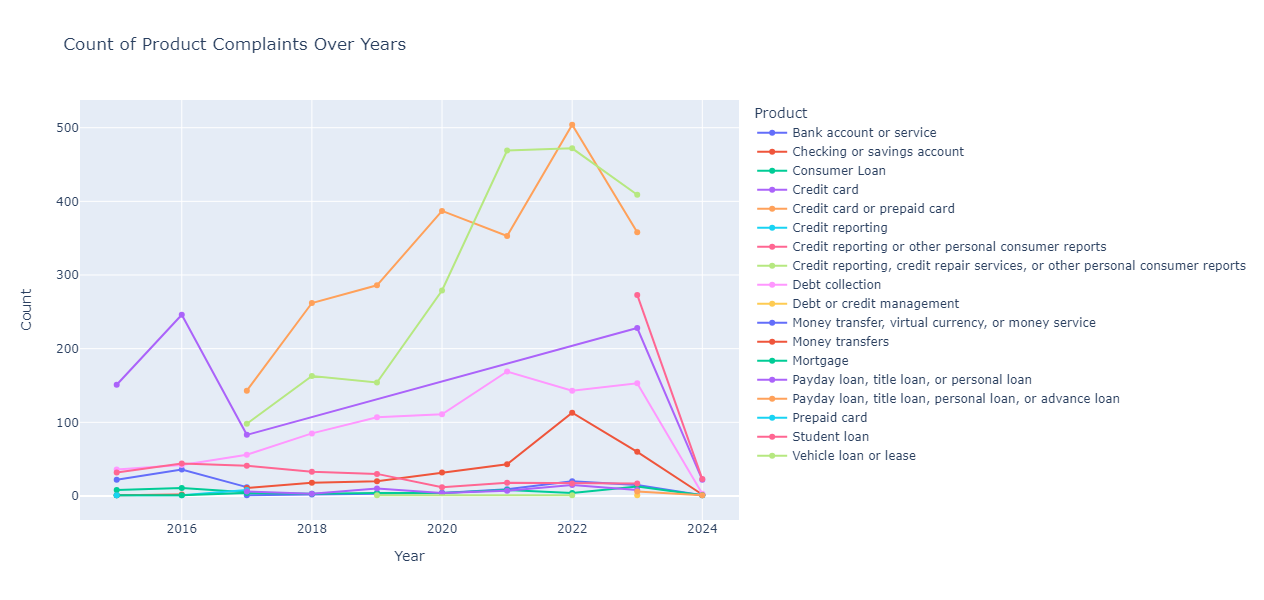

In [9]:
# Sorting the DataFrame by year for each product
pd_df_sorted = pd_df.sort_values(by=["product", "year"])

# Plotting using Plotly
fig = px.line(
    pd_df_sorted,
    x="year",
    y="count_complaint_id",
    color="product",
    markers=True,
    title="Count of Product Complaints Over Years",
)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Count",
    legend_title="Product",
    width=1200,
    height=600,
)

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'> 
<p style='font-size:18px;font-family:Arial;color:#00233c'><b>3.2 Graph for Count of Complaints by Months</b></p> 
<p style='font-size:16px;font-family:Arial;color:#00233c'>The provided graph visualizes the count of complaints by months. We can see that the mean count is above 500, and the July and August months have the maximum complaints count.</p>

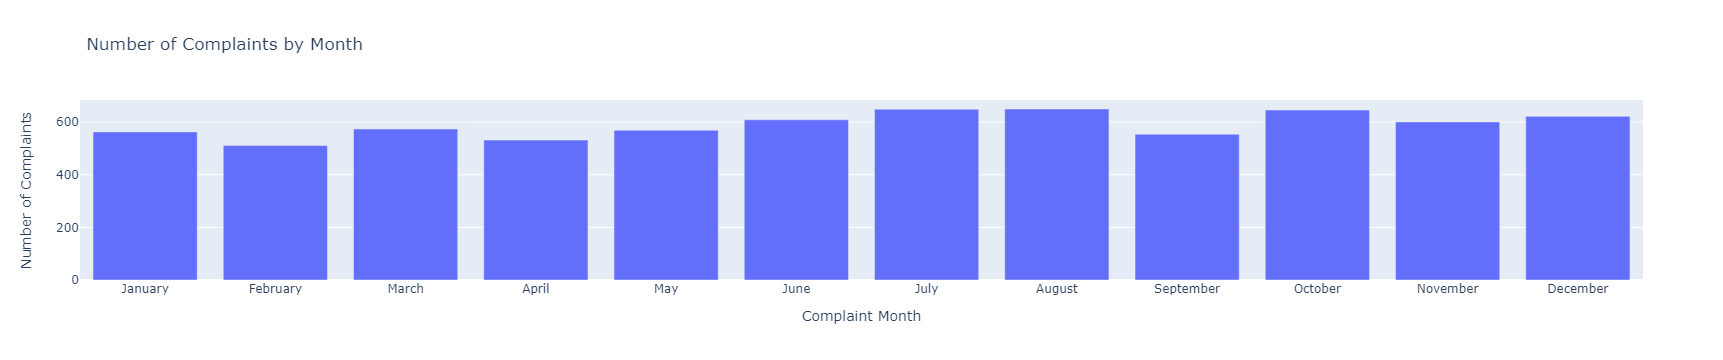

In [10]:
df = df.assign(complaint_month=func.td_month_of_year(df.date_received.expression))
grp_gen = (
    df.select(["complaint_month", "complaint_id"])
    .groupby(["complaint_month"])
    .agg(["count"])
    .to_pandas()
)

# Define a reverse mapping dictionary
reverse_month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

# Create a new column with month names based on reverse mapping
grp_gen["month"] = grp_gen["complaint_month"].map(reverse_month_mapping)


fig = px.bar(
    grp_gen.sort_values(by="complaint_month"),
    x="month",
    y="count_complaint_id",
    labels={"count_complaint_id": "Number of Complaints", "month": "Complaint Month"},
    title="Number of Complaints by Month",
)

# Add hover information
fig.update_traces(hovertemplate="Month: %{x}<br>Number of Complaints: %{y:,}")

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'> 

<p style='font-size:18px;font-family:Arial;color:#00233c'><b>3.3 Graph for Number of Complaints by Product</b></p> <p style='font-size:16px;font-family:Arial;color:#00233c'>The graph displays the number of complaints received for different products. The data shows that the highest number of complaints are related to credit cards or prepaid cards, as well as credit reporting and credit repair services.</p>

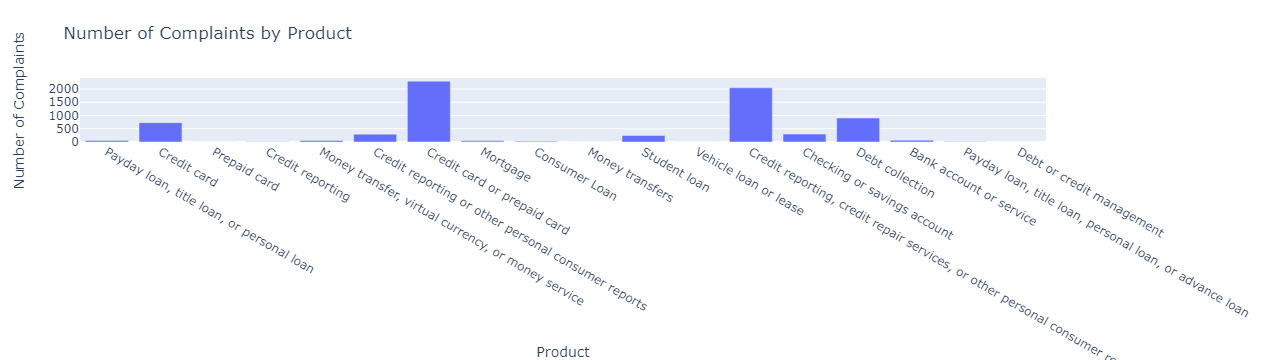

In [11]:
# Assuming df is your DataFrame and sns is seaborn

grp_gen = (
    df.select(["product", "complaint_id"])
    .groupby(["product"])
    .agg(["count"])
    .to_pandas()
)

fig = px.bar(
    grp_gen,
    x="product",
    y="count_complaint_id",
    labels={"count_complaint_id": "Number of Complaints", "product": "Product"},
    title="Number of Complaints by Product",
)

# Add hover information
fig.update_traces(hovertemplate="Product: %{x}<br>Number of Complaints: %{y:,}")

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'> 

<p style='font-size:18px;font-family:Arial;color:#00233c'><b>3.4 Graph for Number of Complaints by Issue</b></p> <p style='font-size:16px;font-family:Arial;color:#00233c'>The graph displays the number of complaints received for different issues. The data shows that the highest number of complaints are related to issue of incorrect information on your report.</p>

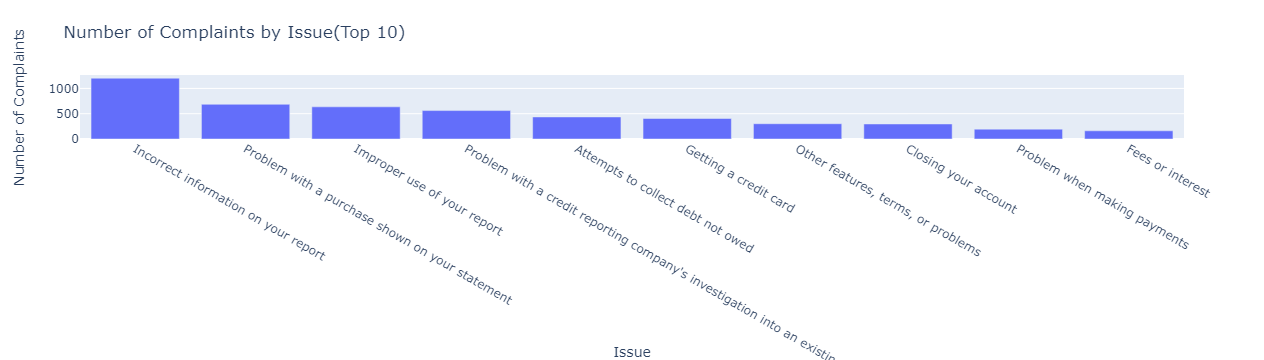

In [12]:
# Assuming df is your DataFrame and sns is seaborn

grp_gen = (
    df.select(["issue", "complaint_id"]).groupby(["issue"]).agg(["count"]).to_pandas()
)

grp_gen = grp_gen.sort_values("count_complaint_id", ascending=False)[:10]

fig = px.bar(
    grp_gen,
    x="issue",
    y="count_complaint_id",
    labels={"count_complaint_id": "Number of Complaints", "issue": "Issue"},
    title="Number of Complaints by Issue(Top 10)",
)

# Add hover information
fig.update_traces(hovertemplate="Issue: %{x}<br>Number of Complaints: %{y:,}")

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'> 

<p style='font-size:18px;font-family:Arial;color:#00233c'><b>3.5 Graph for Number of Complaints by Sub-Issue</b></p> 

<p style='font-size:16px;font-family:Arial;color:#00233c'>The graph displays the number of complaints received for different sub-issues. The data shows that the highest number of complaints are related to issue of information belongs to someone else.</p>

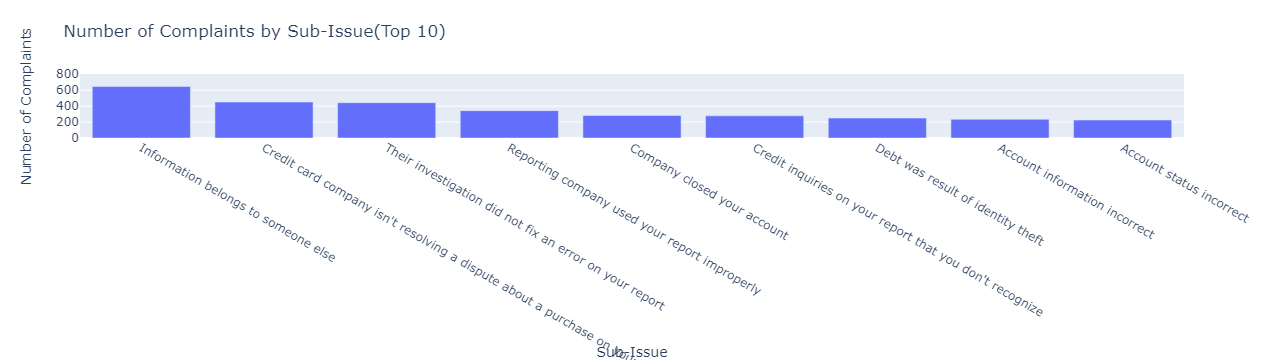

In [13]:
# Assuming df is your DataFrame and sns is seaborn

grp_gen = (
    df.select(["sub_issue", "complaint_id"])
    .groupby(["sub_issue"])
    .agg(["count"])
    .to_pandas()
)

grp_gen = grp_gen.sort_values("count_complaint_id", ascending=False)[:10]

fig = px.bar(
    grp_gen,
    x="sub_issue",
    y="count_complaint_id",
    labels={"count_complaint_id": "Number of Complaints", "sub_issue": "Sub-Issue"},
    title="Number of Complaints by Sub-Issue(Top 10)",
)

# Add hover information
fig.update_traces(hovertemplate="Sub-Issue: %{x}<br>Number of Complaints: %{y:,}")

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'> 

<p style='font-size:18px;font-family:Arial;color:#00233c'><b>3.6 Graph for Number of Complaints by Channel</b></p>

<p style='font-size:16px;font-family:Arial;color:#00233c'>The graph displays the number of complaints received for different issues. The data shows that the all the complaints are submitted by web channel.</p>

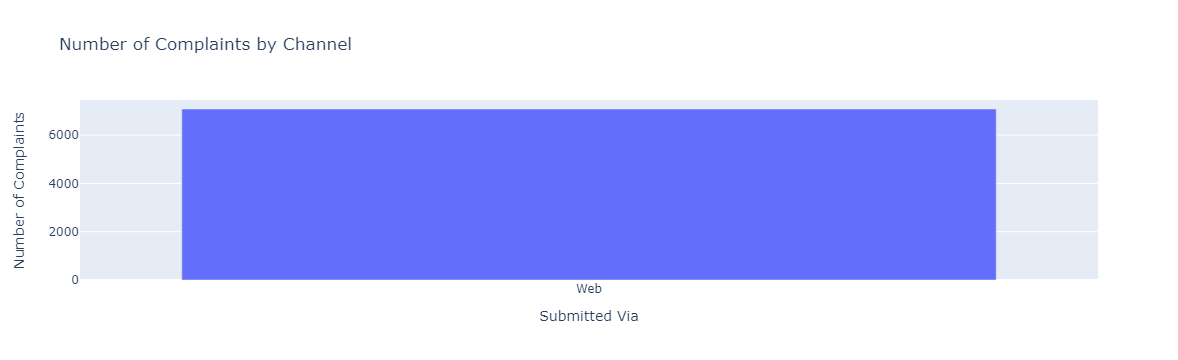

In [14]:
grp_gen = (
    df.select(["submitted_via", "complaint_id"])
    .groupby(["submitted_via"])
    .agg(["count"])
    .to_pandas()
)

# Create a mapping of numbers to product names
product_mapping = {i: product for i, product in enumerate(grp_gen["submitted_via"])}

# Replace product names with numbers in the DataFrame
grp_gen["product_num"] = grp_gen["submitted_via"].map(
    {product: i for i, product in enumerate(grp_gen["submitted_via"])}
)

fig = px.bar(
    grp_gen,
    x="submitted_via",
    y="count_complaint_id",
    labels={
        "count_complaint_id": "Number of Complaints",
        "submitted_via": "Submitted Via",
    },
    title="Number of Complaints by Channel",
)

# Add hover information
fig.update_traces(hovertemplate="Submitted Via: %{x}<br>Number of Complaints: %{y:,}")

fig.show()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>4. Cluster the Complaints</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For our complaint clustering task, we'll be using a sample of the data to cluster the complaints. This approach will allow us to effectively analyze and categorize the complaints without using the entire dataset.</p>

In [ ]:
tdf = DataFrame(in_schema("DEMO_ComplaintAnalysis", "Consumer_Complaints"))
tdf = tdf.assign(id=tdf.complaint_id).drop("complaint_id", axis=1)
tdf

date_received                                                                       product                                 sub_product                                                    issue                                                                              sub_issue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              consumer_complaint_narrative company_public_response        company state zip_code            tags consumer_consent_provided submitted_via date_sent_to_company company_response_to_consumer timely_response consumer_disputed       id
0    01-22-2022                                                               Debt collection                            Credit card debt                        Attempts to collect debt not owed                                                      Debt was result of identity theft                                                                                                                                                                                                                                                                                                                                                                                                      I am having a identity theft issue that I am not able to resolve directly with the credit reporting agencies or the companies. I have decided to file complaint for myself in hopes that the back and forth ends here. I have already open a case with the US Federal Courts to assist me with the suffering this has caused. I had to do my own research into the matter and I find that the credit reporting agencies reporting fraudulent accounts to my credit file without my permission is a consumer law violation per 15 USC 1681 ( b ). DISCOVER is a inaccurate account on my credit file and is not mine.                    None  DISCOVER BANK    KY    41501            None          Consent provided           Web           01/22/2022      Closed with explanation             Yes              None  5137473
1    01-23-2022                                                   Credit card or prepaid card  General-purpose credit card or charge card                              Struggling to pay your bill  Credit card company won't work with you while you're going through financial hardship                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.1 API set-up for speech analytics</b></p>

In [ ]:
cred = {
    "key": getpass(),
    "region": "us-central1-a",
    "project": "csae",
    "model_id": "models/embedding-001",
}

llm = tdmlAI(cred=cred, vertex_ai=True)

In [ ]:
TA_obj = TextAnalyticsAI(llm=llm)

In [18]:
df_pred = TA_obj.extract_embeddings(column=tdf.consumer_complaint_narrative)


embedded_df = df_pred.to_pandas().reset_index()
copy_to_sql(embedded_df, table_name="complaints_embeddings", if_exists="replace")

  0%|          | 0/7080 [00:00<?, ?it/s]

In [19]:
embedded_df = DataFrame("complaints_embeddings")
embedded_df

date_received                                              product                                 sub_product                                            issue                                                                              sub_issue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              consumer_complaint_narrative company_public_response        company state zip_code           tags consumer_consent_provided submitted_via date_sent_to_company     company_response_to_consumer timely_response consumer_disputed  complaint_id  complaint_month  embeddings_0  embeddings_1  embeddings_2  embeddings_3  embeddings_4  embeddings_5  embeddings_6  embeddings_7  embeddings_8  embeddings_9  embeddings_10  embeddings_11  embeddings_12  embeddings_13  embeddings_14  embeddings_15  embeddings_16  embeddings_17  embeddings_18  embeddings_19  embeddings_20  embeddings_21  embeddings_22  embeddings_23  embeddings_24  embeddings_25  embeddings_26  embeddings_27  embeddings_28  embeddings_29  embeddings_30  embeddings_31  embeddings_32  embeddings_33  embeddings_34  embeddings_35  embeddings_36  embeddings_37  embeddings_38  embeddings_39  embeddings_40  embeddings_41  embeddings_42  embeddings_43  embeddings_44  embeddings_45  embeddings_46  embeddings_47  embeddings_48  embeddings_49  embeddings_50  embeddings_51  embeddings_52  embeddings_53  embeddings_54  embeddings_55  embeddings_56  embeddings_57  embeddings_58  embeddings_59  embeddings_60  embeddings_61  embeddings_62  embeddings_63  embeddings_64  embeddings_65  embeddings_66  embeddings_67  embeddings_68  embeddings_69  embeddings_70  embeddings_71  embeddings_72  embeddings_73  embeddings_74  embeddings_75  embeddings_76  embeddings_77  embeddings_78  embeddings_79  embeddings_80  embeddings_81  embeddings_82  embeddings_83  embeddings_84  embeddings_85  embeddings_86  embeddings_87  embeddings_88  embeddings_89  embeddings_90  embeddings_91  embeddings_92  embeddings_93  embeddings_94  embeddings_95  embeddings_96  embeddings_97  embeddings_98  embeddings_99  embeddings_100  embeddings_101  embeddings_102  embeddings_103  embeddings_104  embeddings_105  embeddings_106  embeddings_107  embeddings_108  embeddings_109  embeddings_110  embeddings_111  embeddings_112  embeddings_113  embeddings_114  embeddings_115  embeddings_116  embeddings_117  embeddings_118  embeddings_119  embeddings_120  embeddings_121  embeddings_122  embeddings_123  embeddings_124  embeddings_125  embeddings_126  embeddings_127  embeddings_128  embeddings_129  embeddings_130  embeddings_131  embeddings_132  embeddings_133  embeddings_134  embeddings_135  embeddings_136  embeddings_137  embeddings_138  embeddings_139  embeddings_140  embeddings_141  embeddings_142  embeddings_143  embeddings_144  embeddings_145  embeddings_146  embeddings_147  embeddings_148  embeddings_149  embeddings_150  embeddings_151  embeddings_152  embeddings_153  embeddings_154  embeddings_155  embeddings_156  embeddings_157  embeddings_158  embeddings_159  embeddings_160  embeddings_161  embeddings_162  embeddings_163  embeddings_164  embeddings_165  embeddin

In [20]:
cols = list(embedded_df.columns[:17]) + ["consumer_complaint_narrative"]
embedded_df = embedded_df.drop(columns=cols)
copy_to_sql(df=embedded_df, table_name="kmeans_features", if_exists="replace")

<hr style='height:1px;border:none;background-color:#00233C;'> 

<p style='font-size:18px;font-family:Arial;color:#00233c'><b>4.2 Visualization of Clusters with Complaints</b></p> 

<p style='font-size:16px;font-family:Arial;color:#00233c'>The graph displays the clustering of complaints into distinct groups. Based on the analysis, the data has been divided into 5 optimal clusters, each representing a unique pattern or category of complaints. This clustering approach helps to identify the key areas or types of complaints that are most prevalent, allowing for more targeted investigation and resolution efforts.</p>

In [21]:
no_clusters = 5

# drop existing model
try:
    db_drop_table(table_name="KMeans_Model")
except:
    pass

# Model Table
query = f"""
    SELECT * from TD_KMeans (
    ON kmeans_features as InputTable
    OUT TABLE ModelTable(KMeans_Model)
    USING
        IdColumn('complaint_id')
        TargetColumns{tuple(embedded_df.columns[19:])}
        NumClusters({no_clusters})
        OutputClusterAssignment('true')
) AS dt;
"""

execute_sql(query)

TeradataCursor uRowsHandle=105 bClosed=False

In [22]:
KMeans_Model = DataFrame("KMeans_Model")
print("Data information: \n", KMeans_Model.shape)

Data information: 
 (11, 1524)


In [23]:
no_clusters = 5

# for Cluster info, used later for filtering
query = f"""
    SELECT * from TD_KMeans (
    ON kmeans_features as InputTable
    USING
        IdColumn('complaint_id')
        TargetColumns{tuple(embedded_df.columns[19:])}
        NumClusters({no_clusters})
        OutputClusterAssignment('true')
) AS dt;
"""

kmeans_out_sql = DataFrame.from_query(query)

In [24]:
kmeans_out_sql

complaint_id  td_clusterid_kmeans
0       2205690                    2
1       8066305                    1
2       8110504                    2
3       1930211                    0
4       2062726                    2

In [25]:
embeddings_cluster = DataFrame("complaints_embeddings").join(
    other=kmeans_out_sql, how="full", on="complaint_id=complaint_id", lprefix="L_"
)

In [26]:
# View complaints in cluster 1
embeddings_cluster[
    ["td_clusterid_kmeans", "complaint_id", "consumer_complaint_narrative"]
].loc[embeddings_cluster.td_clusterid_kmeans == 1]

td_clusterid_kmeans  complaint_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           consumer_complaint_narrative
0                    1       1420555                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I am a Discover card member since XX/XX/1987. Discover has placed gray charges on my monthly statement. I disputed the gray charge in writing and requested a written explanation for the charge. I never got a response. I declined telephone calls on the matter.  Discover charged additional fees in retaliation for my dispute of the gray charges. THis is illegal, the company cannot charge fees on items in dispute, including charges.
1                    1       1484479  I am paying my daughter 's student loans to discover because I co-signed with her. \nI have repeatedly asked for a monthly statement and do not receive one. I guess at the amount due each month. Also, when my daughter went to their website to to see if a payment had been received, it showed past due. She called and was finally connected to a real person and was told the payment had not been received. This was XXXX/XXXX/15. The check cleared my account the following XXXX XXXX/XXXX/15. My daughter checked the website again and it said the check had been received on XXXX/XXXX/15. When I looked at the back of the check, it cleared Discover 's bank on XXXX/XXXX/15. I just want a monthly statement sent each month. Also, I guess they sold one of my daughter 's student loans to XXXX XXXX. XXXX XXXX sends a statement each month. My daughter 's school was XXXX ( XXXX In XXXX ). She graduated and has not found a job with compensation sufficient to pay the loans.
2                    1       8059273                                                                                                                                                                                                    Purchased a coat on XXXX for {$630.00} described as new with tags. Received it in the mail damaged and contacted the XXXX seller and didnt reach a resolution. \nCalled Discover Bank customer service to file a dispute, in which I was told that the issue that I presented does not qualify for a chargeback as it does not satisfy their rules and regulations for debit card disputes, as it has to do with item quality. If I had known this, I would have not purchased it with my discover debit. Also, it has nothing to do with the quality of the item I did not receive the item that I was led to believe I was purchasing. \nExtremely misleading, how there are different regulations for discover debit and credit cards when there is nowhere online that explicitly d

In [27]:
# emb = DataFrame('kmeans_features').to_pandas()
clus = embeddings_cluster.to_pandas()

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(clus.iloc[:, 20:-1])

In [29]:
tsne_df = pd.DataFrame(tsne_result, columns=["tsne_1", "tsne_2"])
tsne_df["cluster_id"] = clus["td_clusterid_kmeans"]
tsne_df["complaint_id"] = clus["consumer_complaint_narrative"]

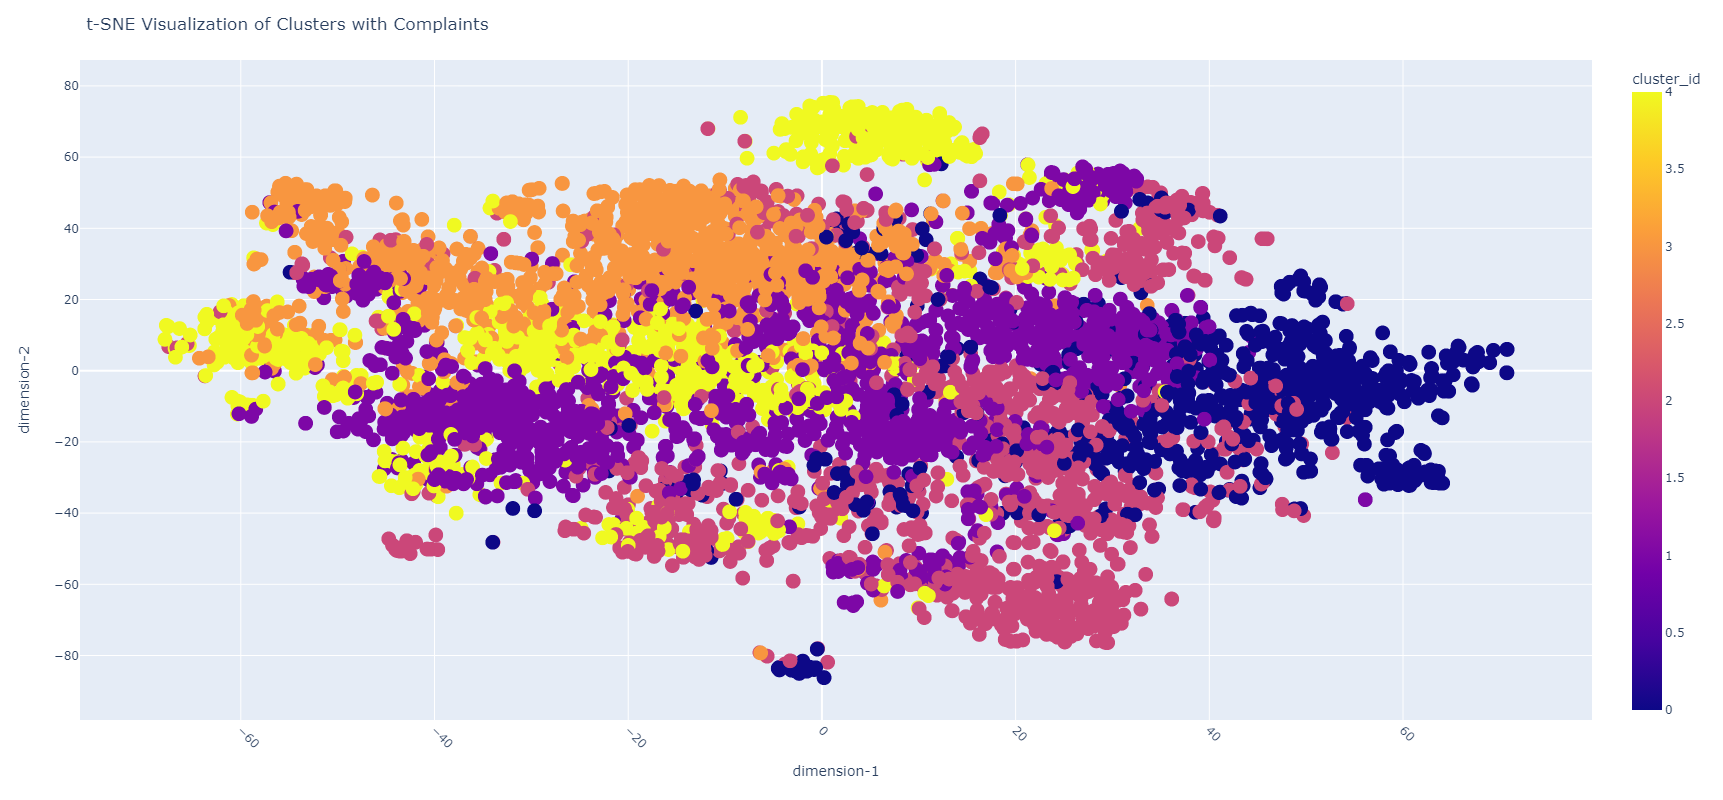

In [30]:
import pandas as pd
import plotly.express as px

# Assuming you have already computed tsne_df as per the previous example

# Create a new DataFrame combining t-SNE results with complaint information
tsne_complaint_df = pd.DataFrame(tsne_result, columns=["tsne_1", "tsne_2"])
tsne_complaint_df["cluster_id"] = clus["td_clusterid_kmeans"]
tsne_complaint_df["complaint_id"] = clus["complaint_id"]
tsne_complaint_df["complaint"] = clus["consumer_complaint_narrative"]

# Truncate text for hover data
max_chars = 50  # Maximum characters to display
tsne_complaint_df["truncated_complaint"] = clus["consumer_complaint_narrative"].apply(
    lambda x: x[:max_chars] + "..." if len(x) > max_chars else x
)

# Plot using Plotly Express
fig = px.scatter(
    tsne_complaint_df,
    x="tsne_1",
    y="tsne_2",
    color="cluster_id",
    hover_data=["complaint_id", "truncated_complaint", "cluster_id"],
)

fig.update_traces(marker=dict(size=15))
fig.update_layout(
    title="t-SNE Visualization of Clusters with Complaints",
    xaxis_title="dimension-1",
    yaxis_title="dimension-2",
    xaxis=dict(tickangle=45),
    width=1000,
    height=800,
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"),
    autosize=False,
)

# Customize the hovertemplate
fig.update_traces(
    hovertemplate="<b>Complaint ID:</b> %{customdata[0]}<br>"
    "<b>Complaint:</b> %{customdata[1]}<br>"
    "<b>Cluster ID:</b> %{customdata[2]}<br><extra></extra>"
)

fig.show()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>5. Cleanup</b>

In [ ]:
remove_context()

<hr style="height:1px;border:none;background-color:#00233C;">
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Dataset:</b>
<br>
<br>
<p style='font-size: 16px; font-family: Arial; color: #00233C;'>The dataset is sourced from <a href='https://www.consumerfinance.gov/data-research/consumer-complaints/'>Consumer Financial Protection Bureau</a></p>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2024. All Rights Reserved
        </div>
    </div>
</footer>